In [1]:
import numpy as np
# 导入pyplot子库
import matplotlib.pyplot as plt
import random

# 如需使用中文，则需要对绘图环境进行设置，选择使用中文字体
import matplotlib
#matplotlib.rcParams['font.family']='SimHei'
#matplotlib.rcParams['font.sans-serif']=['SimHei']

# 使jupyter notebook能直接显示matplotlib绘制的结果
%matplotlib inline 

## Numpy数组的结构和索引操作
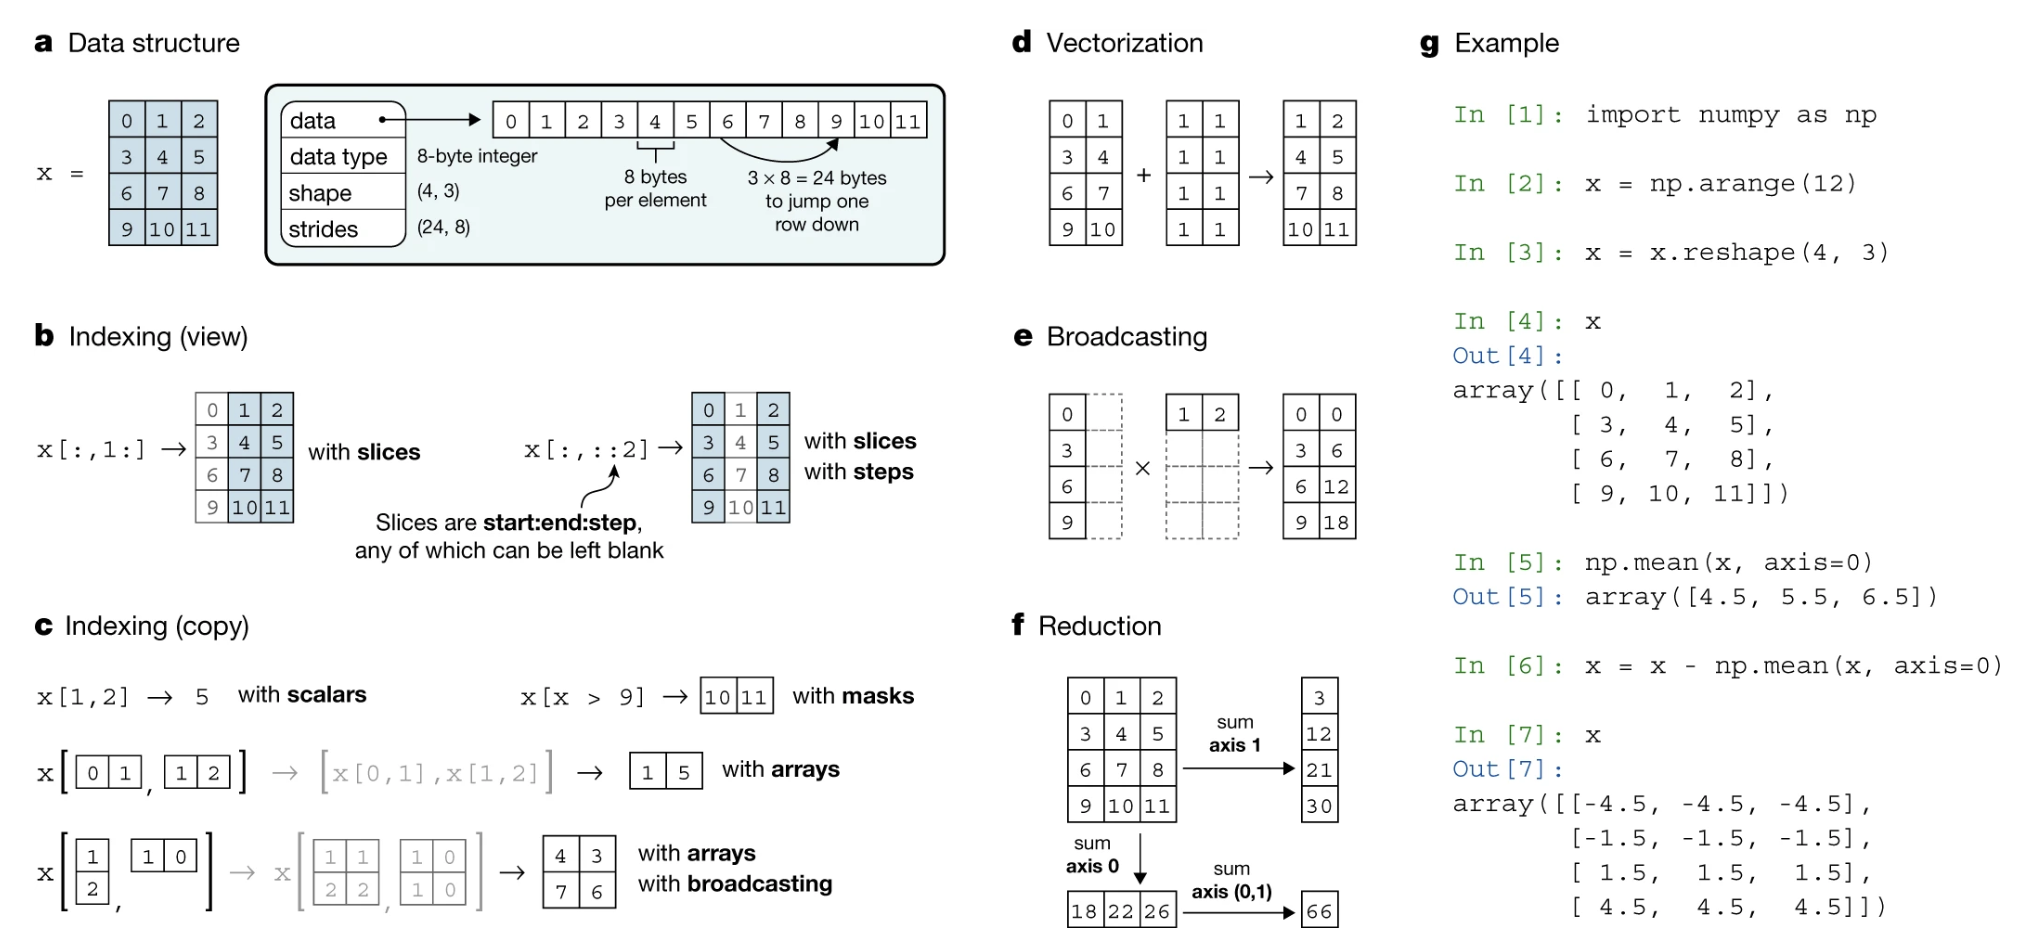

### 练习题：如何使用索引获得矩阵对角线上的元素？


In [2]:
np.random.seed(20240418)
x = np.arange(9).reshape(3,3)
x

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

### 练习题：如何使用普通乘法和broadcasting、reduction机制实现矩阵乘法？


In [3]:
a = np.random.randn(3,3)
b = np.random.randn(3,2)
print(a.dot(b))
print(np.matmul(a, b))


[[ 0.74089866 -0.41588167]
 [ 0.07230933 -0.30906328]
 [-0.01443679  0.56249872]]
[[ 0.74089866 -0.41588167]
 [ 0.07230933 -0.30906328]
 [-0.01443679  0.56249872]]


In [4]:
a = np.random.randn(1,3)
b = np.random.randn(3,1)
np.matmul(a,b)

array([[-0.2495573]])

## 一元线性回归

In [5]:
class LinearRegression(object):
    
    def __init__(self, learning_rate=0.01, max_iter=100, seed=None):
        '''
        一元线性回归类的构造函数：
        参数 学习率：learning_rate
        参数 最大迭代次数：max_iter
        参数 seed：产生随机数的种子    
        从正态分布中采样w和b的初始值
        '''
        np.random.seed(seed)
        self.lr = learning_rate
        self.max_iter = max_iter
        self.w = np.random.normal(1, 0.1)
        self.b = np.random.normal(1, 0.1)
        self.loss_arr = []
          
    def fit(self, x, y):
        '''
        类的方法：训练函数
        参数 自变量：x 
        参数 因变量：y
        返回每一次迭代后的损失函数
        '''
        for i in range(self.max_iter):
            self.__train_step(x,y)
            y_pred = self.predict(x)
            self.loss_arr.append(self.loss(y, y_pred))
    
    def __f(self, x, w, b):
        '''
        类的方法：计算一元线性回归函数在x处的值
        '''
        return x * w + b
      
    def predict(self, x):
        '''
        类的方法：预测函数
        参数：自变量：x 
        返回：对x的回归值
        '''
        y_pred = self.__f(x, self.w, self.b)
        return y_pred
   
    def loss(self, y_true, y_pred):  
        '''
        类的方法：计算损失
        参数 真实因变量：y_true 
        参数 预测因变量：y_pred   
        返回：MSE损失
        '''
        return np.mean((y_true - y_pred)**2)
    
    def __calc_gradient(self, x, y):
        '''
        类的方法：分别计算对w和b的梯度
        '''
        d_w = np.mean(2* (x * self.w + self.b - y) * x)
        d_b = np.mean(2*(x * self.w + self.b - y))
        return d_w, d_b
   
    def __train_step(self,x,y):
        '''
        类的方法：单步迭代，即一次迭代中对梯度进行更新
        '''
        d_w, d_b = self.__calc_gradient(x,y)
        self.w = self.w - self.lr * d_w
        self.b = self.b - self.lr * d_b
        return self.w, self.b

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def show_data(x, y, w=None, b=None):
    plt.scatter(x, y, marker='.')
    if w is not None and b is not None:
        plt.plot(x, w*x+b, c='red')
    plt.show()

# data generation
np.random.seed(272)
data_size = 100
x = np.random.uniform(low=1.0, high=10.0, size=data_size)
y = x * 20 + 10 + np.random.normal(loc=0.0, scale=10.0, size=data_size)

print(x, y)

[3.22948482 8.90713648 9.44108164 3.7540866  5.18814828 2.56289109
 3.00154469 3.54680345 6.56105895 2.77558845 8.7331636  4.55623757
 7.27448618 5.21980683 2.02123466 5.70244546 9.04862078 3.61807215
 8.26495323 1.17483877 7.93409977 6.80274505 6.44082128 5.39565557
 7.87504622 3.18006603 9.74028186 7.85282943 1.46440793 1.67410887
 3.98889502 3.87154281 2.65275974 5.18012949 7.58711931 9.29960965
 1.04624586 1.15467664 3.25266916 5.2879521  1.93090899 6.34184487
 3.48792901 6.82321567 1.86626583 7.24899019 1.53388668 7.94965088
 5.09122067 3.85023415 6.99344605 7.41953419 5.62320728 2.76467079
 9.55238812 4.24228745 6.29956213 9.69569912 7.98976674 9.9880322
 2.19406312 4.7533448  8.44340561 4.84655189 8.48405352 6.40979505
 5.91926314 6.3675922  7.53056809 6.49461497 5.95364464 9.78171215
 7.32064404 3.21811252 7.01256725 2.22014269 6.71627606 7.64192303
 4.66348509 2.21697786 3.19788601 9.48460207 9.43819064 4.89674176
 1.28426277 6.16401141 1.35479553 6.29276673 8.98995125 5.38998

In [7]:
# train / test split
shuffled_index = np.random.permutation(data_size)
print(shuffled_index)

x = x[shuffled_index]
y = y[shuffled_index]

print(x, y)
split_index = int(data_size * 0.7)
x_train = x[:split_index]
y_train = y[:split_index]
x_test = x[split_index:]
y_test = y[split_index:]



[62 24 85  0 26 72 40 47 92 67  3 71 98 19 27 46 65 68  7 66 32 54 49 25
 82 31 86 73 23 96  9 18 38 87 42 17 59 78 13 12 81 36 55 61 88 79 45  8
 64 51 14 63 41 15 84  4 75 50 56 22 76  2  6 35 90 80 28 44 37 16 58 89
  1 34 95 60 74 21 30 43 53 11 29 52 83 57 20 69 70 10  5 97 94 77 33 48
 93 39 91 99]
[8.44340561 7.87504622 6.16401141 3.22948482 9.74028186 7.32064404
 1.93090899 7.94965088 1.53388415 6.3675922  3.7540866  9.78171215
 2.88741486 1.17483877 7.85282943 1.53388668 6.40979505 7.53056809
 3.54680345 5.91926314 2.65275974 9.55238812 3.85023415 3.18006603
 9.43819064 3.87154281 1.35479553 3.21811252 5.39565557 2.69809158
 2.77558845 8.26495323 3.25266916 6.29276673 3.48792901 3.61807215
 9.9880322  4.66348509 5.21980683 7.27448618 9.48460207 1.04624586
 4.24228745 4.7533448  8.98995125 2.21697786 7.24899019 6.56105895
 8.48405352 7.41953419 2.02123466 4.84655189 6.34184487 5.70244546
 1.28426277 5.18814828 2.22014269 6.99344605 6.29956213 6.44082128
 6.71627606 9.44108164 3

w: 	21.0
b: 	4.41


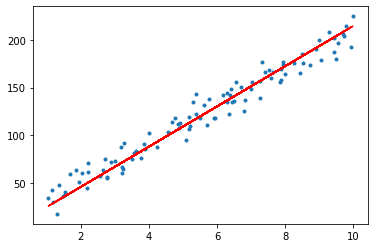

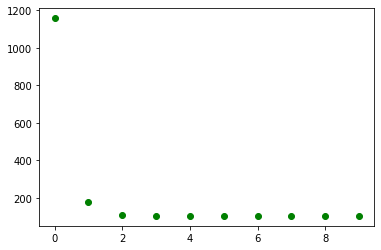

In [8]:
# train the liner regression model
regr = LinearRegression(learning_rate=0.01, max_iter=10, seed=314)
regr.fit(x_train, y_train)
print('w: \t{:.3}'.format(regr.w))
print('b: \t{:.3}'.format(regr.b))
show_data(x, y, regr.w, regr.b)

# plot the evolution of cost
plt.scatter(np.arange(len(regr.loss_arr)), regr.loss_arr, marker='o', c='green')
plt.show()

## 使用Matplotlib库进行图表绘制

Matplotlib是一个功能强大的Python绘图和可视化库。在这里，我们主要介绍其中pyplot子库的一些常用功能。

* 安装方式：pip install matplotlib

* 官方主页：https://matplotlib.org/

In [9]:
# 导入pyplot子库
import matplotlib.pyplot as plt

# 如需使用中文，则需要对绘图环境进行设置，选择使用中文字体
import matplotlib
#matplotlib.rcParams['font.family']='simhei'
#matplotlib.rcParams['font.sans-serif']=['simhei']

# 使jupyter notebook能直接显示matplotlib绘制的结果
%matplotlib inline 

In [10]:
import numpy as np

# 生成数据
np.random.seed(272)
data_size = 100
# x在1到10间均匀分布
x = np.random.uniform(low=1.0, high=10.0, size=data_size)
# y = x * 20 + 10 + 随机噪声
y = x * 20 + 10 + np.random.normal(loc=0.0, scale=10.0, size=data_size)

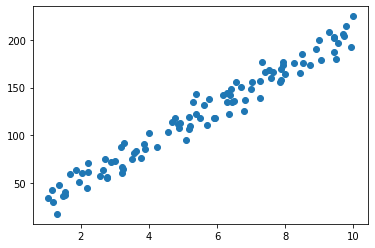

In [11]:
# 绘制散点图
plt.scatter(x, y)
plt.show()

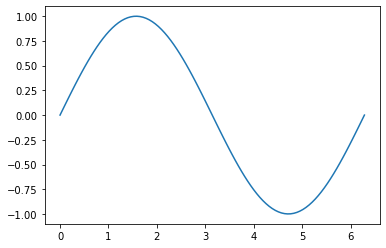

In [12]:
# 绘制折线图
x = np.linspace(0, 2*np.pi, num=100) 
y = np.sin(x)
plt.plot(x, y)
plt.show()

In [13]:
class LinearRegression(object):
    
    def __init__(self, learning_rate=0.01, max_iter=100, seed=None):
        '''
        一元线性回归类的构造函数：
        参数 学习率：learning_rate
        参数 最大迭代次数：max_iter
        参数 seed：产生随机数的种子    
        从正态分布中采样w和b的初始值
        '''
        np.random.seed(seed)
        self.lr = learning_rate
        self.max_iter = max_iter
        self.w = np.random.normal(1, 0.1)
        self.b = np.random.normal(1, 0.1)
        self.loss_arr = []
          
    def fit(self, x, y):
        '''
        类的方法：训练函数
        参数 自变量：x 
        参数 因变量：y
        返回每一次迭代后的损失函数
        '''
        for i in range(self.max_iter):
            self.__train_step(x,y)
            y_pred = self.predict(x)
            self.loss_arr.append(self.loss(y, y_pred))
    
    def __f(self, x, w, b):
        '''
        类的方法：计算一元线性回归函数在x处的值
        '''
        return x * w + b
      
    def predict(self, x):
        '''
        类的方法：预测函数
        参数：自变量：x 
        返回：对x的回归值
        '''
        y_pred = self.__f(x, self.w, self.b)
        return y_pred
   
    def loss(self, y_true, y_pred):  
        '''
        类的方法：计算损失
        参数 真实因变量：y_true 
        参数 预测因变量：y_pred   
        返回：MSE损失
        '''
        return np.mean((y_true - y_pred)**2)
    
    def __calc_gradient(self, x, y):
        '''
        类的方法：分别计算对w和b的梯度
        '''
        d_w = np.mean(2* (x * self.w + self.b - y) * x)
        d_b = np.mean(2*(x * self.w + self.b - y))
        return d_w, d_b
   
    def __train_step(self,x,y):
        '''
        类的方法：单步迭代，即一次迭代中对梯度进行更新
        '''
        d_w, d_b = self.__calc_gradient(x,y)
        self.w = self.w - self.lr * d_w
        self.b = self.b - self.lr * d_b
        return self.w, self.b

def generate_data(data_size, noise_scale=10.0, w=20.0, b=10.0):
    # 生成数据
    np.random.seed(272)
    # x在1到10间均匀分布
    x = np.random.uniform(low=1.0, high=10.0, size=data_size)
    # y = x * 20 + 10 + 随机噪声
    y = x * w + b + np.random.normal(loc=0.0, scale=noise_scale, size=data_size)

    # train / test split
    shuffled_index = np.random.permutation(data_size)
    x = x[shuffled_index]
    y = y[shuffled_index]
    split_index = int(data_size * 0.7)
    x_train = x[:split_index]
    y_train = y[:split_index]
    x_test = x[split_index:]
    y_test = y[split_index:]
    
    return x, y, x_train, y_train, x_test, y_test

x, y, x_train, y_train, x_test, y_test = generate_data(100)
# train the liner regression model
regr = LinearRegression(learning_rate=0.01, max_iter=10, seed=314)
regr.fit(x_train, y_train)
print('w: \t{:.3}'.format(regr.w))
print('b: \t{:.3}'.format(regr.b))


w: 	21.0
b: 	4.41


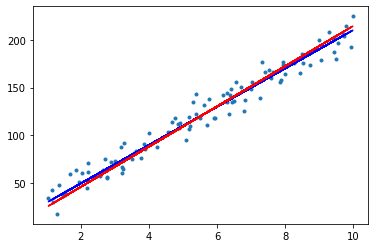

In [14]:
# 绘制数据点
plt.scatter(x, y, marker='.')
# 用蓝线绘制生成数据时的方程
plt.plot(x, x * 20 + 10, 'b')
# 用红线绘制在训练集上拟合得到的直线方程
plt.plot(x, x * regr.w + regr.b, 'r')
plt.show()

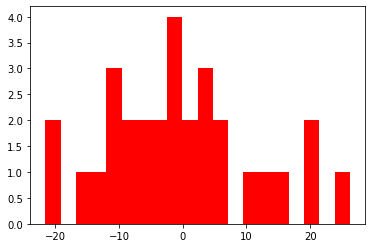

In [15]:
# 生成数据
# 数据集大小为100
x, y, x_train, y_train, x_test, y_test = generate_data(100)

# 训练模型
regr = LinearRegression(learning_rate=0.01, max_iter=10, seed=314)
regr.fit(x_train, y_train)

# 测试误差
test_error = y_test - regr.predict(x_test)
plt.hist(test_error, color='r', bins=20)
plt.show()

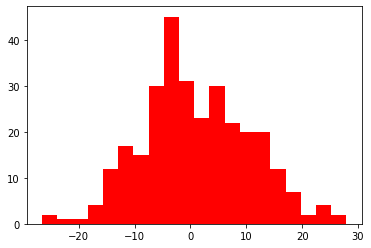

In [16]:
# 生成数据
# 数据集大小为1000
x, y, x_train, y_train, x_test, y_test = generate_data(1000)

# 训练模型
regr = LinearRegression(learning_rate=0.01, max_iter=10, seed=314)
regr.fit(x_train, y_train)

# 测试误差
test_error = y_test - regr.predict(x_test)
plt.hist(test_error, color='r', bins=20)
plt.show()

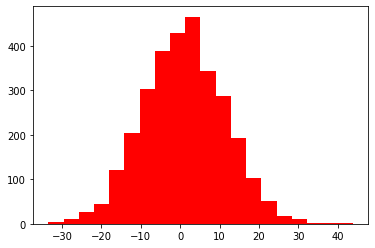

In [17]:
# 生成数据
# 数据集大小为10000
x, y, x_train, y_train, x_test, y_test = generate_data(10000)

# 训练模型
regr = LinearRegression(learning_rate=0.01, max_iter=10, seed=314)
regr.fit(x_train, y_train)

# 测试误差
test_error = y_test - regr.predict(x_test)
plt.hist(test_error, color='r', bins=20)
plt.show()

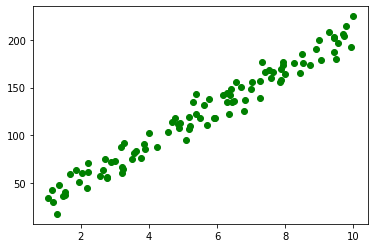

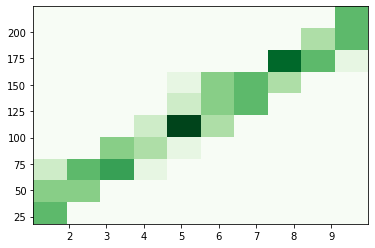

In [18]:
# 生成数据
x, y, x_train, y_train, x_test, y_test = generate_data(100, noise_scale=10.0)

# 散点图
plt.scatter(x, y, c='g')
plt.show()

# 二维直方图
plt.hist2d(x, y, cmap='Greens')
plt.show()

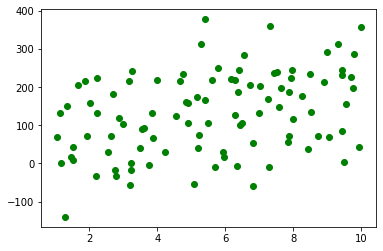

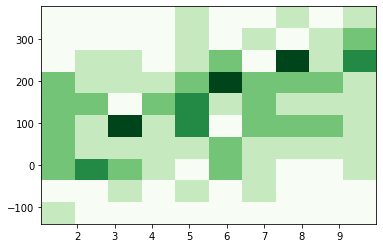

In [19]:
# 生成数据
x, y, x_train, y_train, x_test, y_test = generate_data(100, noise_scale=100.0)

# 散点图
plt.scatter(x, y, c='g')
plt.show()

# 二维直方图
plt.hist2d(x, y, cmap='Greens')
plt.show()

In [20]:
# 例：绘制z=x^2+y^2
# 给定x和y的范围
x = np.linspace(-1, 1, num=5)
y = np.linspace(-1, 1, num=5)
# 使用np.meshgrid函数生成一个网格
x, y = np.meshgrid(x, y)
print(x)
print(y)

[[-1.  -0.5  0.   0.5  1. ]
 [-1.  -0.5  0.   0.5  1. ]
 [-1.  -0.5  0.   0.5  1. ]
 [-1.  -0.5  0.   0.5  1. ]
 [-1.  -0.5  0.   0.5  1. ]]
[[-1.  -1.  -1.  -1.  -1. ]
 [-0.5 -0.5 -0.5 -0.5 -0.5]
 [ 0.   0.   0.   0.   0. ]
 [ 0.5  0.5  0.5  0.5  0.5]
 [ 1.   1.   1.   1.   1. ]]


In [21]:
# 计算z在网格上每一点的值
z = x**2 + y**2 
print(z)

[[2.   1.25 1.   1.25 2.  ]
 [1.25 0.5  0.25 0.5  1.25]
 [1.   0.25 0.   0.25 1.  ]
 [1.25 0.5  0.25 0.5  1.25]
 [2.   1.25 1.   1.25 2.  ]]


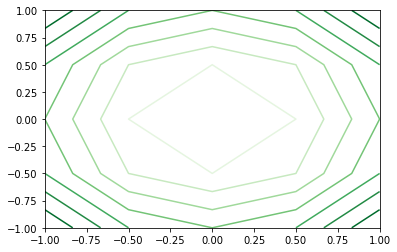

In [22]:
plt.contour(x, y, z, cmap="Greens")
plt.show()

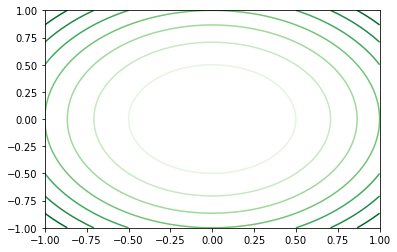

In [23]:
# 用更多的点，使函数更为平滑
x = np.linspace(-1, 1, num=50)
y = np.linspace(-1, 1, num=50)
x, y = np.meshgrid(x, y)
z = x**2 + y**2 
plt.contour(x, y, z, cmap="Greens")
plt.show()

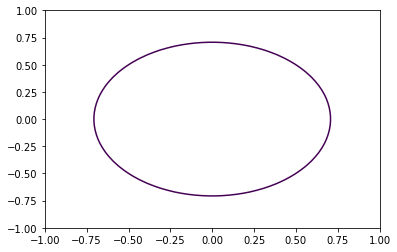

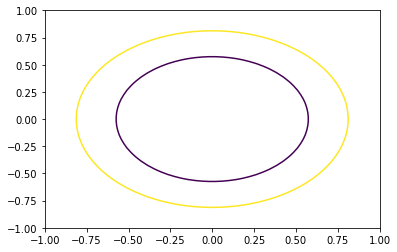

In [24]:
# 只保留z=0.5一条等高线
plt.contour(x, y, z, [0.5])
plt.show()

# 保留z=[0.33, 0.66]两条等高线
plt.contour(x, y, z, [0.33, 0.66])
plt.show()

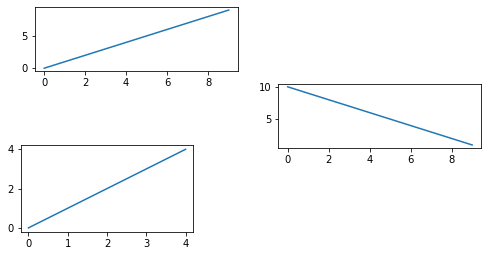

In [25]:
# 绘制多个子图
# 绘图环境的设置
plt.figure(figsize=(8,4)) # 设置画布大小
plt.subplot(321) # 在一个三行两列的绘图区域中选择子区域1开始绘图
plt.plot(range(10), range(10)) # x=0..9, y=0..9

plt.subplot(3, 2, 4) # 在一个三行两列的绘图区域中选择子区域4开始绘图
plt.plot(range(10), range(10,0,-1))

# 直接在画布上按照[左边缘位置，下边缘位置，宽度，高度]选择绘图区域
plt.axes([0.1, 0.1, 0.3, 0.3]) 
plt.plot(range(5), range(5))
plt.show()

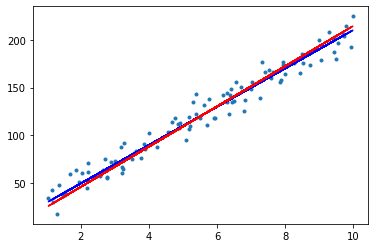

In [26]:
# 保存绘制的图像
x, y, x_train, y_train, x_test, y_test = generate_data(100)
# train the liner regression model
regr = LinearRegression(learning_rate=0.01, max_iter=10, seed=314)
regr.fit(x_train, y_train)
# 绘制数据点
plt.scatter(x, y, marker='.')
# 用蓝线绘制生成数据时的方程
plt.plot(x, x * 20 + 10, 'b')
# 用红线绘制在训练集上拟合得到的直线方程
plt.plot(x, x * regr.w + regr.b, 'r')
# 保存为png格式的位图
plt.savefig("results.png")
# 保存为pdf格式的矢量图
plt.savefig("results.pdf")

## 一元线性回归的可视化
### 模型
$$
\hat{y} = w\cdot x + b
$$
### 损失函数
$$
L(w, b; \mathbf{x}, \mathbf{y})=\frac{1}{N} \sum_{i=1}^N (w\cdot x_i + b - y_i)^2
$$


### 生成数据

In [27]:
np.random.seed(123)
X = np.array([[1], [2], [3], [5]])
#X = np.linspace(1,5,100)[:,np.newaxis]
real_w = 2
real_b = 1
y = real_w * X + real_b #+ np.random.normal(0, 0.5, X.shape)
print("y={}*x+{}".format(real_w, real_b))


y=2*x+1


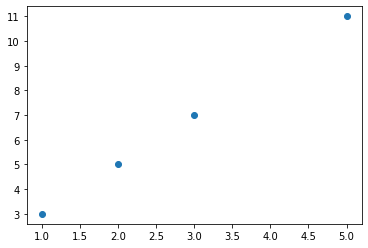

In [28]:
plt.scatter(X.flatten(), y.flatten())
plt.show()

### 梯度下降更新公式
$$
\frac{\partial L(w, b; \mathbf{x}, \mathbf{y})}{\partial w}=\frac{2}{N} \mathbf{x}^T\cdot(w\mathbf{x} + b - \mathbf{y})
$$
$$
\frac{\partial L(w, b; \mathbf{x}, \mathbf{y})}{\partial b}=\frac{2}{N} \mathbf{1}^T\cdot(w\mathbf{x} + b - \mathbf{y})
$$

In [29]:
# 初始化w，b
w = 3
b = 2
path = [(w, b)]

# 设置学习率
lr = 0.01

# i记录迭代轮数
steps = 0

# 梯度计算公式
def cal_gradient(X, y, w, b):
    N = X.shape[0]
    diff = w * X + b - y
    d_w = (2 / N * np.matmul(X.T, diff)).item()
    d_b = (2 / N * np.matmul(np.ones(X.T.shape), diff)).item()
    return d_w, d_b

# 梯度下降step步,更新全局变量w和b
def update_parameter(X, y, update_step=1):
    global w, b, steps
    for i in range(update_step):
        d_w, d_b  = cal_gradient(X, y, w, b)
        w -= lr * d_w
        b -= lr * d_b
        path.append((w, b))
        steps += 1

### 绘制L(w, b)的图像
$$
L(w, b; \mathbf{x}, \mathbf{y})=\frac{1}{N} \sum_{i=1}^N (w\cdot x_i + b - y_i)^2
$$

In [30]:
def plot_loss(X, y, path=None, w_range=(1,3), b_range=(0,2)):
    # 生成w，b网格，w和b均为100x100的矩阵
    ws = np.linspace(*w_range, 100)
    bs = np.linspace(*b_range, 100)
    ws, bs = np.meshgrid(ws, bs)
    
    # 对于网格中的每个(w,b)值计算loss function
    loss = np.mean((np.matmul(X, ws.reshape(100, 100, 1, 1)) + bs.reshape(100, 100, 1, 1) - y)**2, axis=(2,3))
    
    # 绘制等高线图
    plt.contour(ws, bs, loss, levels=50)
    
    # 如果给定path参数，保存梯度下降过程中(w,b)更新的轨迹，则绘制该轨迹
    if path is not None:
        path = [(w, b) for w,b in path if w_range[0] <= w <= w_range[1] and b_range[0] <= b <= b_range[1]]
        w_path = [w for w, b in path]
        b_path = [b for w, b in path]
        plt.plot(w_path, b_path, 'r+-')
        plt.scatter(w_path[-1:], b_path[-1:])
        print("current loss: {}".format(np.mean((w_path[-1] * X + b_path[-1] - y)**2)))
    plt.show()

### 迭代更新过程
单独运行下面一个cell可以完成一步梯度下降, 观察拟合直线和loss function的变化情况。

#iter: 1:	 y=2.75*x+1.925


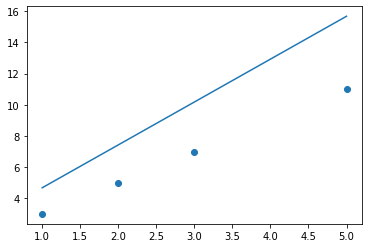

current loss: 10.155625000000004


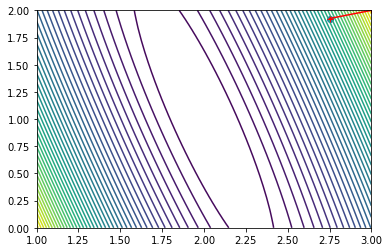

In [31]:
update_parameter(X, y, update_step=1)

print("#iter: {}:\t y={}*x+{}".format(steps, w, b))
plt.scatter(X.flatten(), y.flatten())
plt.plot(np.linspace(1, 5, 10), w*np.linspace(1,5,10)+b)
plt.show()

plot_loss(X, y, path)

#iter: 11:	 y=1.9069839960278532*x+1.6531825597599898


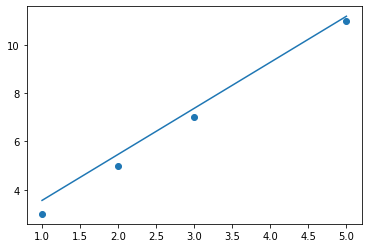

current loss: 0.17684385842289313


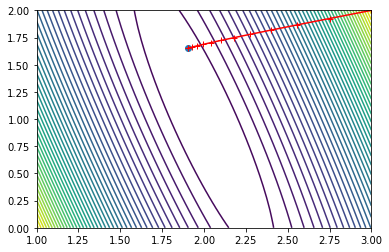

In [32]:
#一次更新10步
update_parameter(X, y, update_step=10)

print("#iter: {}:\t y={}*x+{}".format(steps, w, b))
plt.scatter(X.flatten(), y.flatten())
plt.plot(np.linspace(1, 5, 10), w*np.linspace(1,5,10)+b)
plt.show()

plot_loss(X, y, path)

#iter: 111:	 y=1.880622722532312*x+1.4142394415992883


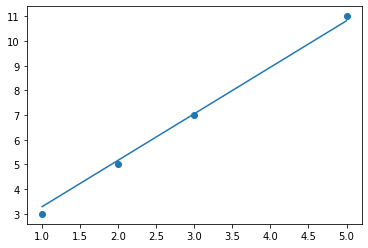

current loss: 0.03856165297034332


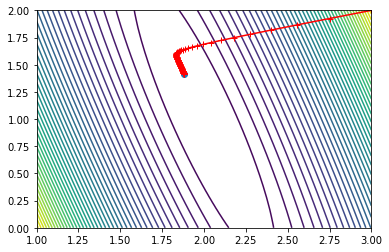

In [33]:
#太慢了，一次更新100步
update_parameter(X, y, update_step=100)

print("#iter: {}:\t y={}*x+{}".format(steps, w, b))
plt.scatter(X.flatten(), y.flatten())
plt.plot(np.linspace(1, 5, 10), w*np.linspace(1,5,10)+b)
plt.show()

plot_loss(X, y, path)

## 学习率的影响
我们把学习率调整到0.1试试

In [83]:
np.random.seed(123)
X = np.array([[1], [2], [3], [5]])
#X = np.linspace(1,5,100)[:,np.newaxis]
real_w = 2
real_b = 1
y = real_w * X + real_b #+ np.random.normal(0, 0.5, X.shape)
print("y={}*x+{}".format(real_w, real_b))

# 初始化w，b
w = 3
b = 2
path = [(w, b)]

# 设置学习率
lr = 0.1

# i记录迭代轮数
steps = 0

y=2*x+1


#iter: 10:	 y=5.207927282816408*x+2.390376319861816


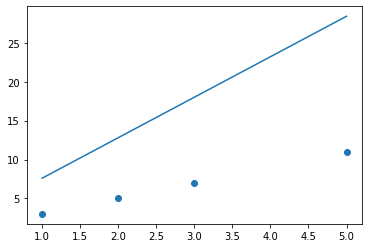

current loss: 103.20333578332819


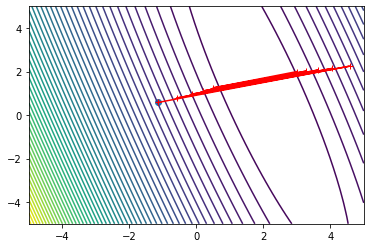

In [93]:
update_parameter(X, y, update_step=1)

print("#iter: {}:\t y={}*x+{}".format(steps, w, b))
plt.scatter(X.flatten(), y.flatten())
plt.plot(np.linspace(1, 5, 10), w*np.linspace(1,5,10)+b)
plt.show()

plot_loss(X, y, path, w_range=(-5,5), b_range=(-5,5))

## 多元线性回归

[[ 1.13516234]
 [-4.45348752]
 [ 3.72540821]
 [ 2.48960809]]


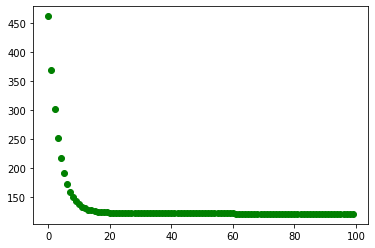

In [34]:
# %load 第9周第2次MultiLinearRegression.py

import numpy as np
import matplotlib.pyplot as plt


class LinearRegressionMulti(object):
    def __init__(self, dim_in, learning_rate=0.01, max_iter=100, seed=None):
        """
        一元线性回归类的构造函数：
        参数 学习率：learning_rate
        参数 最大迭代次数：max_iter
        参数 seed：产生随机数的种子
        从正态分布中采样w的初始值
        """
        np.random.seed(seed)
        self.lr = learning_rate
        self.max_iter = max_iter
        self.w = np.random.normal(1, 0.1, [dim_in+1, 1]) # w 的维度为输入维度+1
        self.loss_arr = []

    def fit(self, x, y):
        """
        类的方法：训练函数
        参数 自变量：x
        参数 因变量：y
        返回每一次迭代后的损失函数
        """
        #首先在x矩阵后面增加一列1
        x = np.hstack([x, np.ones((x.shape[0], 1))])
        for i in range(self.max_iter):
            self.__train_step(x, y)
            y_pred = self.predict(x)
            self.loss_arr.append(self.loss(y, y_pred))

    def __f(self, x, w):
        '''
        类的方法：计算一元线性回归函数在x处的值
        '''
        return x.dot(w)


    def predict(self, x):
        '''
        类的方法：预测函数
        参数：自变量：x
        返回：对x的回归值
        '''
        y_prd = self.__f(x, self.w)
        return y_prd

    def loss(self, y_true, y_pred):
        '''
        类的方法：计算损失
        参数 真实因变量：y_true
        参数 预测因变量：y_pred
        返回：MSE损失
        '''
        return np.mean((y_true - y_pred) ** 2)

    def __calc_gradient(self, x, y):
        '''
        类的方法：分别计算对w和b的梯度
        '''
        N = x.shape[0]
        diff = (x.dot(self.w) - y)
        grad = x.T.dot(diff)
        d_w = (2 * grad) / N
        return d_w

    def __train_step(self, x, y):
        '''
        类的方法：单步迭代，即一次迭代中对梯度进行更新
        '''
        d_w = self.__calc_gradient(x, y)
        self.w = self.w - self.lr * d_w
        return self.w

# data generation
np.random.seed(272)
data_size = 100
dim_in = 3
dim_out = 1
x = np.random.uniform(low=1.0, high=10.0, size=[data_size, dim_in])
map_true = np.array([[1.5], [-5.], [3.]])
y = x.dot(map_true) + 10 + np.random.normal(loc=0.0, scale=10.0, size=[data_size, dim_out])

# train / test split
shuffled_index = np.random.permutation(data_size)
x = x[shuffled_index, :]
y = y[shuffled_index, :]
split_index = int(data_size * 0.7)
x_train = x[:split_index, :]
y_train = y[:split_index, :]
x_test = x[split_index:, :]
y_test = y[split_index:, :]

# train the liner regression model
regr = LinearRegressionMulti(dim_in, learning_rate=0.01, max_iter=100, seed=0)
regr.fit(x_train, y_train)
print(regr.w)

x_test_aug = np.hstack([x_test, np.ones((x_test.shape[0], 1))])
y_pred = regr.predict(x_test_aug)
res = y_pred - y_test


# plot the evolution of cost
plt.scatter(np.arange(len(regr.loss_arr)), regr.loss_arr, marker='o', c='green')
plt.show()
